In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
df = pd.read_pickle('pp_train_isnull_4.pkl')
df.head()

,row_id,incident_id,vehicle_id,occupant_id,injury,total_veh_in_inc,total_occ_in_inc,total_occ_in_veh,actual_veh_in_inc,actual_per_in_inc,...,drv_weight_isnull,drv_crash_isnull,drv_pts_isnull,drv_dui_isnull,drv_spd_isnull,veh_speed_isnull,inc_datetime_yr,veh_age,drv_ban1_num,drv_ban2_num
0,2,2,1,1,Major,1,2,2,1,2,...,1,0,0,0,0,1,2013.0,9.0,NaN,NaN
1,3,2,1,2,Fatal,1,2,2,1,2,...,1,0,0,0,0,1,2013.0,9.0,NaN,NaN
2,10,4,1,1,Possible,2,3,2,2,3,...,0,0,0,0,0,1,2011.0,7.0,NaN,NaN
3,11,4,1,2,Unharmed,2,3,2,2,3,...,0,0,0,0,0,1,2011.0,7.0,NaN,NaN
4,12,4,2,1,Fatal,2,3,1,2,3,...,0,0,0,0,0,1,2011.0,8.0,28.0,28.0


In [3]:
df.drop(['inc_datetime', 'drv_ban1_mo', 'drv_ban1_yr', 'drv_ban2_mo', 'drv_ban2_yr', 'veh_year'], axis = 1, inplace = True)

In [4]:
encoding = {'Unharmed': 0, 'Possible': 1, 'Minor': 2, 'Major': 3, 'Fatal': 4}

y = df['injury'].map(encoding)
print(y)

0         3
1         4
2         1
3         0
4         4
5         0
6         4
7         1
8         1
9         4
10        3
11        3
12        3
13        4
14        2
15        4
16        4
17        3
18        0
19        0
20        4
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
145033    0
145034    4
145035    4
145036    4
145037    3
145038    4
145039    0
145040    2
145041    0
145042    2
145043    4
145044    4
145045    3
145046    4
145047    4
145048    4
145049    2
145050    4
145051    2
145052    3
145053    0
145054    0
145055    4
145056    0
145057    0
145058    4
145059    4
145060    0
145061    0
145062    4
Name: injury, Length: 145063, dtype: int64


In [5]:
df.drop(['injury'], axis = 1, inplace = True)

In [6]:
X = pd.get_dummies(df)
X.head()

,row_id,incident_id,vehicle_id,occupant_id,total_veh_in_inc,total_occ_in_inc,total_occ_in_veh,actual_veh_in_inc,actual_per_in_inc,actual_occ_in_veh,...,veh_descrip_Instability,veh_descrip_Non-collision,veh_descrip_Non-roadway,veh_descrip_Pothole,veh_descrip_unknown,veh_damage_Disabling,veh_damage_Minor,veh_damage_Moderate,veh_damage_No damage,veh_damage_unknown
0,2,2,1,1,1,2,2,1,2,2,...,1,0,0,0,0,1,0,0,0,0
1,3,2,1,2,1,2,2,1,2,2,...,1,0,0,0,0,1,0,0,0,0
2,10,4,1,1,2,3,2,2,3,2,...,0,0,0,0,0,1,0,0,0,0
3,11,4,1,2,2,3,2,2,3,2,...,0,0,0,0,0,1,0,0,0,0
4,12,4,2,1,2,3,1,2,3,1,...,0,0,0,0,0,1,0,0,0,0


In [8]:
from sklearn.model_selection import GroupKFold

folds_5 = list(GroupKFold(n_splits = 5).split(X,
                                                 groups = X.loc[:, 'incident_id']))

folds_2 = list(GroupKFold(n_splits = 2).split(X,
                                             groups = X.loc[:, 'incident_id']))

In [9]:
X.drop(['row_id', 'incident_id', 'vehicle_id', 'occupant_id'], axis = 1, inplace = True)

In [10]:
import xgboost as xgb

xgb_all = xgb.DMatrix(X, label = y)

In [11]:
print(X.shape)
print(len(y))

(145063, 357)
145063


In [15]:
set(y)

{0, 1, 2, 3, 4}

In [16]:
params_ = {'booster': 'gbtree',
           'objective': 'multi:softprob',
          'verbosity': 1,
           'nthread': 4,
           'learning_rate': 0.01,
           'gamma': 0,
           'max_depth': 7,
           'min_child_weight': 1,
           'max_delta_step': 0,
           'subsample': 0.9,
           'colsample_bytree': 0.8,
           #'colsample_bylevel': ,
           #'colsample_bynode': ,
           'reg_alpha': 0.1,
           'reg_lambda': 1.5,
           'eval_metric': 'mlogloss',
           'num_class': 5,
           #'tree_method': ,
           #'sketch_eps':,
           #'scale_pos_weight':,
           #'update': ,
           #'refresh_leaf':,
           #'process_type':,
           #'grow_policy':,
           #'max_leaves': 0,
           #'max_bin': 256,
           #'predictor':,
           #'num_parallel_tree':,
          }

In [17]:
mod_1 = xgb.cv(params_,
                 xgb_all,
                 num_boost_round = 1000,
                 #nfolds = 3,
               #stratified = False,
               folds = folds_5,
               metrics = 'mlogloss',
               #obj = None,
               #feval = None,
               #maximize = False,
               early_stopping_rounds = 100,
               #fpreproc = None,
               #as_pandas = True,
               verbose_eval = 50,
               #show_stdv = True,
               seed = 0,
               #callbacks = None,
               #shuffle = True
              )

[0]	train-mlogloss:1.59986+4.20305e-05	test-mlogloss:1.6+9.22098e-05
[50]	train-mlogloss:1.2888+0.000658711	test-mlogloss:1.29553+0.00231829
[100]	train-mlogloss:1.1346+0.000993861	test-mlogloss:1.14656+0.0033957
[150]	train-mlogloss:1.04611+0.00121761	test-mlogloss:1.06272+0.00415924
[200]	train-mlogloss:0.991026+0.00134848	test-mlogloss:1.01197+0.00475
[250]	train-mlogloss:0.953875+0.00133591	test-mlogloss:0.979245+0.00530863
[300]	train-mlogloss:0.92731+0.00138381	test-mlogloss:0.957259+0.00567191
[350]	train-mlogloss:0.907187+0.00123437	test-mlogloss:0.941718+0.00596911
[400]	train-mlogloss:0.890946+0.00123375	test-mlogloss:0.93019+0.00617653
[450]	train-mlogloss:0.877379+0.00134194	test-mlogloss:0.921458+0.00617922
[500]	train-mlogloss:0.86549+0.00134909	test-mlogloss:0.914617+0.00623479
[550]	train-mlogloss:0.85457+0.00139531	test-mlogloss:0.908952+0.00619018
[600]	train-mlogloss:0.844139+0.00136933	test-mlogloss:0.90409+0.00623223
[650]	train-mlogloss:0.834572+0.0013509	test-mlo

In [26]:
X_train = X.loc[folds_2[0][0]]
y_train = y[folds_2[0][0]]
X_test = X.loc[folds_2[0][1]]
y_test = y[folds_2[0][1]]


xgb_train = xgb.DMatrix(X_train, label = y_train)
xgb_test = xgb.DMatrix(X_test, label = y_test)

In [27]:
print(X_train.shape)
print(len(y_train))

print(X_test.shape)
print(len(y_test))

(72531, 357)
72531
(72532, 357)
72532


In [28]:
mod_2 = xgb.train(params_,
                 xgb_train,
                 num_boost_round = 500,
                 evals = [(xgb_train, 'train'), (xgb_test, 'test')],
                 early_stopping_rounds = 50,
                 verbose_eval = 100)

[0]	train-mlogloss:1.59975	test-mlogloss:1.6
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[100]	train-mlogloss:1.13102	test-mlogloss:1.14894
[200]	train-mlogloss:0.984171	test-mlogloss:1.01477
[300]	train-mlogloss:0.917157	test-mlogloss:0.960433
[400]	train-mlogloss:0.877701	test-mlogloss:0.934094
[499]	train-mlogloss:0.848802	test-mlogloss:0.918903


In [30]:
from xgboost import XGBClassifier

mod_3 = XGBClassifier(max_depth = 6,
                     learning_rate = 0.01,
                     n_estimators = 1000,
                     silent = True,
                     objective = 'multi:softprob',
                      num_class = 5,
                     booster = 'gbtree',
                     n_jobs = 4,
                     gamma = 0.5,
                     min_child_weight = 1,
                     max_delta_step = 0,
                     subsample = 0.9,
                     colsample_bytree = 0.8,
                     colsample_bylevel = 1,
                     reg_alpha = 0.5,
                     reg_lambda = 1.5,
                     scale_pos_weight = 1,
                     random_state = 42)

In [32]:
mod_3.fit(X_train, y_train,
         eval_set = [(X_train, y_train), (X_test, y_test)],
         eval_metric = 'mlogloss',
          early_stopping_rounds = 50,
          verbose = 100
         )

[0]	validation_0-mlogloss:1.60018	validation_1-mlogloss:1.60036
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[100]	validation_0-mlogloss:1.14734	validation_1-mlogloss:1.15914
[200]	validation_0-mlogloss:1.00785	validation_1-mlogloss:1.02737
[300]	validation_0-mlogloss:0.946234	validation_1-mlogloss:0.973169
[400]	validation_0-mlogloss:0.911806	validation_1-mlogloss:0.946627
[500]	validation_0-mlogloss:0.886664	validation_1-mlogloss:0.930189
[600]	validation_0-mlogloss:0.865631	validation_1-mlogloss:0.918364
[700]	validation_0-mlogloss:0.848046	validation_1-mlogloss:0.909877
[800]	validation_0-mlogloss:0.832871	validation_1-mlogloss:0.903506
[900]	validation_0-mlogloss:0.819426	validation_1-mlogloss:0.898581
[999]	validation_0-mlogloss:0.807405	validation_1-mlogloss:0.894807


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.5, learning_rate=0.01,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=4, nthread=None, num_class=5,
       objective='multi:softprob', random_state=42, reg_alpha=0.5,
       reg_lambda=1.5, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9)

In [33]:
mod_3.feature_importances_

array([1.08641749e-02, 2.35494636e-02, 1.77652389e-02, 8.80969130e-03,
       1.60858128e-02, 1.16559640e-02, 1.73443407e-02, 4.20564823e-02,
       8.00540112e-03, 3.12214792e-02, 5.61211519e-02, 5.88007318e-03,
       6.66769454e-03, 2.96504050e-02, 6.84688892e-03, 1.83903351e-02,
       2.45079454e-02, 5.58836153e-03, 6.55517727e-03, 8.58465675e-04,
       3.08380881e-03, 2.07115263e-02, 4.16730909e-05, 1.81277953e-02,
       2.45496184e-02, 8.75134938e-05, 1.71276403e-03, 4.37567447e-04,
       1.23352348e-03, 2.91711651e-04, 5.54252125e-04, 2.78376252e-03,
       3.63806076e-03, 6.30513858e-03, 1.15851196e-03, 6.66769483e-05,
       4.06312663e-03, 8.25127179e-04, 1.92529685e-03, 2.02947948e-03,
       9.08473390e-04, 1.29186577e-04, 3.00046260e-04, 1.26144448e-02,
       4.16730927e-06, 6.20929059e-03, 0.00000000e+00, 1.09016802e-02,
       0.00000000e+00, 5.76755591e-03, 6.83438685e-03, 9.37644567e-04,
       5.20080188e-03, 1.68359291e-03, 1.20435236e-03, 9.08473390e-04,
      

In [34]:
mod_3.base_score

0.5

In [35]:
mod_3.predict(X_test)

array([4, 4, 0, ..., 4, 4, 4], dtype=int64)

In [36]:
mod_3.predict_proba(X_test)

array([[3.1134481e-02, 4.9687143e-02, 1.3629039e-01, 1.7082243e-01,
        6.1206555e-01],
       [4.6256285e-02, 5.4511163e-02, 1.7191957e-01, 1.8909219e-01,
        5.3822076e-01],
       [7.3262805e-01, 6.7347236e-02, 7.9857036e-02, 3.1181144e-02,
        8.8986509e-02],
       ...,
       [1.3265428e-02, 1.9972678e-02, 3.1270500e-02, 4.4974200e-02,
        8.9051723e-01],
       [1.6851225e-03, 1.0412715e-03, 1.0610415e-03, 7.6207501e-04,
        9.9545056e-01],
       [6.0557318e-04, 6.9284911e-04, 8.2086714e-04, 7.0347270e-04,
        9.9717724e-01]], dtype=float32)

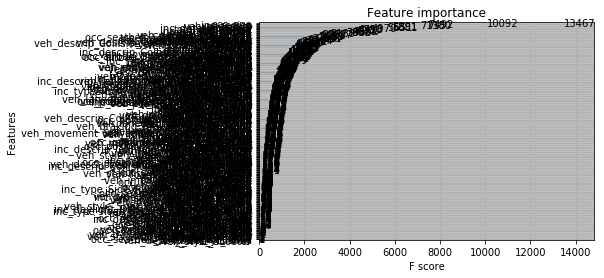

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(mod_3)